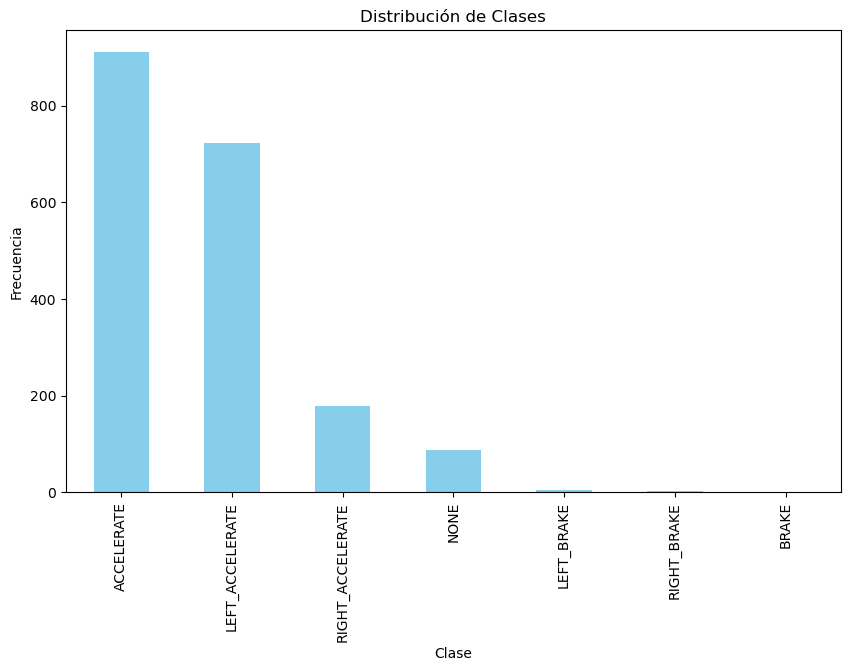

MyPredictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 0
 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 2 2 2 2 2 2 2 0 0
 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from ann import costL2, backprop, forwardprop, iterateThetas

# EJERCICIO 2 - visualiza los datos

# Cargar los datos desde el archivo CSV
data = pd.read_csv("data/AllData.csv", header=None, names=["dist1", "dist2", "dist3", "dist4", "dist5", 
                                                           "x", "y", "z", "tiempo", "accion"])

# Visualizar la distribución de clases
class_distribution = data["accion"].value_counts()

# Graficar la distribución de clases
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()


# EJERCICIO 3 - Limpia el dataset

# Eliminar las columnas de posición y tiempo ya que consideramos que no son tan relevantes como la distancia de los raycast
cleanDataset = data.drop(["x", "y", "z", "tiempo"], axis=1)

# Realizar one-hot encoding para la columna "accion"
one_hot_encoded = pd.get_dummies(data["accion"], prefix="accion")

# Añadir los valores generados del one_hot_encoded al dataset
cleanDataset = pd.concat([cleanDataset, one_hot_encoded], axis=1)
cleanDataset = cleanDataset.drop(["accion"], axis=1)

# No consideramos necesario normalizar los valores, ya que todos representan una distancia de -1 a 10


# EJERCICIO 4 - Prueba diferentes modelos de Machine Learning


# Entrenar modelo con backpropagation

# Utilizaremos los valores de las distancias de los 5 raycast como input
X = cleanDataset.iloc[:, :5]
# Mientras que utilizaremos los 7 estados de accion, pasados por one_hot_encoded
Y = cleanDataset.iloc[:, 5:]

neuronsInputLayer = 5
neuronsFirstHiddenLayer = 100
neuronsOutputLayer = 7

e = 0.12
iterations = 100
myAlpha = .5
myLambda = 1

# Valores aleatorios en theta1 y theta2
theta1 = np.random.uniform(low=-e, high=e, size=( neuronsFirstHiddenLayer, neuronsInputLayer+1))
theta2 = np.random.uniform(low=-e, high=e, size=(neuronsOutputLayer, neuronsFirstHiddenLayer+1))
#theta3 = np.random.uniform(low=-e, high=e, size=(99, +1))
#theta4 = np.random.uniform(low=-e, high=e, size=(99, +1))

## Ajustar thetha1 y theta2 teniendo en cuenta los parametros dados
#thetas = iterateThetas([theta1, theta2], X, Y, iterations, myLambda, myAlpha)


#########################################################
####### Compara los resultados con SKLearn ##############
#########################################################

# Entrenar a SKLearn con los mismos valores
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes = (neuronsFirstHiddenLayer)
sklearn_neural_network = MLPClassifier(
    alpha=myLambda, 
    learning_rate_init=myAlpha, 
    activation='logistic',
    hidden_layer_sizes=hidden_layer_sizes,
    max_iter = iterations
)
sklearn_neural_network.fit(X, Y)


# Ajustar thetha1 y theta2 teniendo en cuenta los parametros dados
thetas = iterateThetas([theta1, theta2], X, Y, iterations, myLambda, myAlpha)



## Realizar la propagación hacia adelante
layerValues, weighted_inputs = forwardprop(thetas, X)
myPredictions = np.argmax(layerValues[-1], axis=1)
print("MyPredictions:", myPredictions[:1000])

# Predicciones con MLPClassifier
layerValues_sklearn = sklearn_neural_network.predict(X)
sklearnPredictions = np.argmax(layerValues_sklearn, axis=1)
print("SklearnPredictions:", sklearnPredictions[:1000])


myAccuracy_booleans = myPredictions == sklearnPredictions
myAccuracy = np.mean(myAccuracy_booleans) * 100
print("Accuracy : ", myAccuracy, "%")


## Tener las predicciones mas probables en "predictions"
#predictions = np.argmax(layerValues[-1], axis=1)
#totalCases = len(y_index_numeric)
##Numero de veces que se ha acertado el valor
#correctCases = np.sum(predictions == y_index_numeric)
#accuracy = correctCases / totalCases
#
##print("predictions:", predictions[:-1000])
#print("Accuracy : ", accuracy)

